In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score,accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#replace zeros
zero_not_accepted=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"]
for column in zero_not_accepted:
    df[column]=df[column].replace(0,np.nan)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.nan,mean)

In [7]:
df["Glucose"]

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [8]:
#split dataset
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [9]:
#feature Scaling
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)

X_test=sc_X.transform(X_test)

In [10]:
knn=KNeighborsClassifier(n_neighbors=11)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [12]:
y_pred=knn.predict(X_test)

In [15]:
#Evaluate The Model
cf_matrix=confusion_matrix(y_test,y_pred)

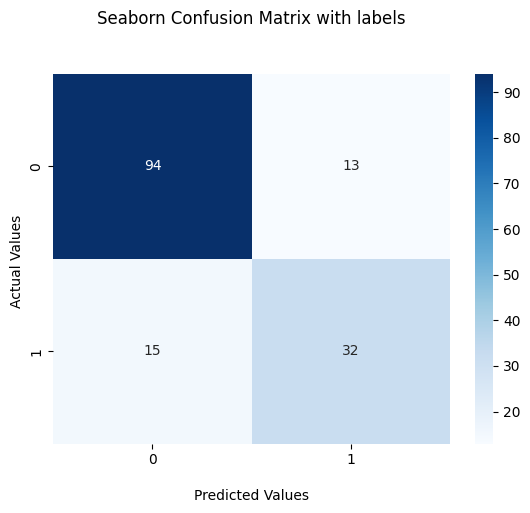

In [16]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred ).ravel()

In [18]:
tn, fp, fn, tp

(np.int64(94), np.int64(13), np.int64(15), np.int64(32))

In [19]:
#The accuracy rate is equal to (tn+tp)/(tn+tp+fn+fp)
accuracy_score(y_test,y_pred)

0.8181818181818182

In [20]:
#The precision is the ratio of tp/(tp + fp)
precision_score(y_test,y_pred)

0.7111111111111111

In [21]:
##The recall is the ratio of tp/(tp + fn)
recall_score(y_test,y_pred)

0.6808510638297872

In [22]:
#error rate=1-accuracy which is lies bertween 0 and 1
error_rate=1-accuracy_score(y_test,y_pred)

In [23]:
error_rate

0.18181818181818177